### Importing Libraries

In [20]:
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

### Load Audio Files

In [21]:
audio_file = "./audio/test.wav"

### Example of using IPython display to play music in the Jupyter Notebook

In [22]:
ipd.Audio(audio_file)

### Using Librosa to load audio

In [23]:
claps, sr = librosa.load(audio_file)

print(claps)
print(sr)

[ 0.          0.          0.         ...  0.05590291 -0.00079652
 -0.04393331]
22050


In [24]:
# duration of one sample
sample_duration = 1 / sr
print(f"Duration of one sample is: {sample_duration:.6f} seconds")

Duration of one sample is: 0.000045 seconds


In [25]:
# duration of the audio signal in seconds
duration = sample_duration * len(claps)
print(f"Duration of signal is: {duration:.6f} seconds")

Duration of signal is: 5.000000 seconds


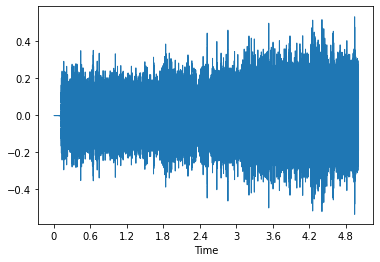

In [26]:
# Visualise the waveform

librosa.display.waveshow(claps)
plt.show()

### Calculate Amplitude Envelope

In [28]:
def amplitude_envelope(signal: iter, frame_size: int, hop_length: int):
    """
    Calculate the amplitude envelope at each frame with a hop length to include overlaps

    signal: a list of amplitude values
    frame_size: the size of a frame
    hop_length: the size of a hop
    """
    amplitude_envelope = []

    # calculate amplitude envelope for each frame
    for i in range(0, len(signal), hop_length):
        frame = signal[i:i+frame_size]
        max_amplitude_in_frame = max(frame)
        amplitude_envelope.append(max_amplitude_in_frame)

    return np.array(amplitude_envelope)

FRAME_SIZE = 1024
HOP_LENGTH = 512

ae_claps = amplitude_envelope(claps, FRAME_SIZE, HOP_LENGTH)

### Visualising

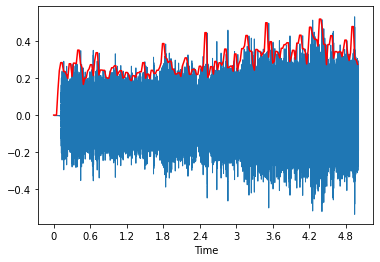

In [29]:
frames = range(0, ae_claps.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

librosa.display.waveshow(claps)
plt.plot(t, ae_claps, color="r")
plt.show()